## HW2 | KNN Graph Instruction

#### 1. Fill in all code (under # put your code here)

#### 2. Must use Pandas or Numpy if there is an instruction 

#### 3. Generate the plot that is exactly the same as the table right after each code block

#### 4. Answer the question at the end of this jupyter notebook


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

## Swiss Banknote Dataset

Six variables measured on 100 genuine and 100 counterfeit old Swiss 1000-franc
bank notes. The data stem from Flury and Riedwyl (1988). The columns correspond
to the following one label and six variables:

0. Conterfeit - 0: genuine bank notes、1: genuine bank notes (Labels)


1. Length - Length of the bank note


2. Left - Height of the bank note, measured on the left


3. Right - Height of the bank note, measured on the right


4. Bottom - Distance of inner frame to the lower border


5. Top - Distance of inner frame to the upper border


6. Diagonal - Length of the diagonal



More details: [Kaggle | Swiss banknote conterfeit detection](https://www.kaggle.com/chrizzles/swiss-banknote-conterfeit-detection)

In [2]:
# Use [Pandas] to import data | banknotes.csv
# Put your code here 

bank = pd.read_csv("banknotes.csv")
label = bank.conterfeit

bank.head()

,conterfeit,Length,Left,Right,Bottom,Top,Diagonal
0,0,214.8,131.0,131.1,9.0,9.7,141.0
1,0,214.6,129.7,129.7,8.1,9.5,141.7
2,0,214.8,129.7,129.7,8.7,9.6,142.2
3,0,214.8,129.7,129.6,7.5,10.4,142.0
4,0,215.0,129.6,129.7,10.4,7.7,141.8


In [3]:
# Use [Numpy function] to stack the following columns
# The 5-th column "Bottom" as X, the 6-th column "Top" as Y
# Put your code here
x=np.array(bank["Bottom"])
y=np.array(bank["Top"])
data_xy = np.dstack((x,y))
data_xy=data_xy[0]
data_xy

array([[ 9. ,  9.7],
       [ 8.1,  9.5],
       [ 8.7,  9.6],
       [ 7.5, 10.4],
       [10.4,  7.7],
       [ 9. , 10.1],
       [ 7.9,  9.6],
       [ 7.2, 10.7],
       [ 8.2, 11. ],
       [ 9.2, 10. ],
       [ 7.9, 11.7],
       [ 7.7, 10.5],
       [ 7.9, 10.8],
       [ 7.7, 10.9],
       [ 7.7, 10.8],
       [ 9.3,  8.5],
       [ 8.2,  9.8],
       [ 9. ,  9. ],
       [ 7.4, 11.5],
       [ 8.6, 10. ],
       [ 8.4, 10. ],
       [ 8.1, 10.3],
       [ 8.4, 10.8],
       [ 8.7, 10. ],
       [ 7.4, 10.8],
       [ 8. , 11. ],
       [ 8.9,  9.8],
       [ 9.8,  9.5],
       [ 7.4, 10.5],
       [ 8.3,  9. ],
       [ 7.9, 10.7],
       [ 8.6,  9.1],
       [ 7.7, 10.5],
       [ 8.4, 10.3],
       [ 8.9, 10.6],
       [ 9.4,  9.7],
       [ 8.4,  9.7],
       [ 7.9, 10. ],
       [ 8.5,  9.3],
       [ 8.1,  9.7],
       [ 8.9,  9.4],
       [ 8.8,  9.9],
       [ 9.3,  9. ],
       [ 9. ,  9.8],
       [ 8.2, 10.2],
       [ 8.3, 10.2],
       [ 8.3, 10.2],
       [ 7.3,

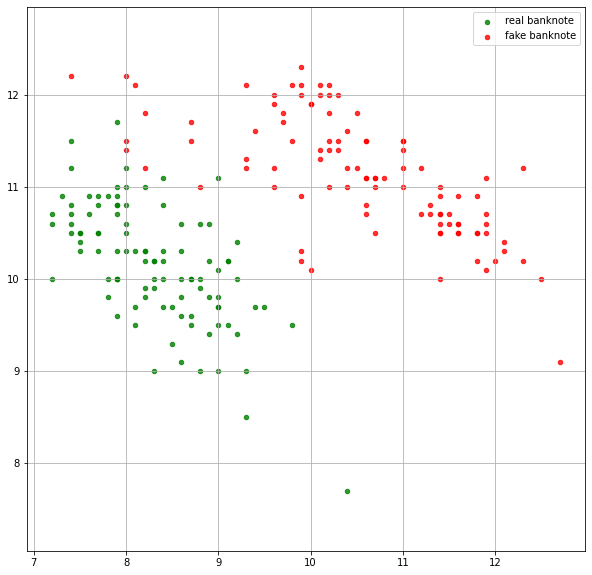

In [4]:
# Use [Numpy function] to find where label = 0 / label = 1
# Put your code here
con=np.array(bank["conterfeit"])
index_0 = np.where(con==0)
index_1 = np.where(con==1)

# Use data_xy to plot the scatter plot 
# Label = 0 → color = green | Label = 1 → color = red
# Fill X and Y in the plt.scatter 
# Remember to put on grid and legend and equal axis
# Put your code here
X0=[]
Y0=[]
X1=[]
Y1=[]
for i in index_0:
    X0.append(data_xy[i,0])
    Y0.append(data_xy[i,1])
for i in index_1:
    X1.append(data_xy[i,0])
    Y1.append(data_xy[i,1])
plt.figure(figsize = (10, 10))
plt.scatter(X0,Y0,s=20, alpha=0.8,c="green")
plt.scatter(X1,Y1,s=20, alpha=0.8,c="red")
plt.axis('equal')
plt.grid()
plt.legend(labels=["real banknote","fake banknote"])

In [5]:
# Use [Numpy function] to calculate the squared distance matrix between each points
# Put your code here
dist_sq=[]
for i in range(len(data_xy)):
    dist_sq.append([])
    for j in range(len(data_xy)):
        dist_sq[i].append(round(((data_xy[i,0]-data_xy[j,0])**2+(data_xy[i,1]-data_xy[j,1])**2),2))
dist_sq=np.array(dist_sq)

In [6]:
dist_sq

array([[ 0.  ,  0.85,  0.1 , ...,  4.52,  7.09,  4.68],
       [ 0.85,  0.  ,  0.37, ...,  8.81, 12.5 ,  8.41],
       [ 0.1 ,  0.37,  0.  , ...,  5.86,  8.81,  5.86],
       ...,
       [ 4.52,  8.81,  5.86, ...,  0.  ,  0.37,  0.32],
       [ 7.09, 12.5 ,  8.81, ...,  0.37,  0.  ,  1.09],
       [ 4.68,  8.41,  5.86, ...,  0.32,  1.09,  0.  ]])

In [7]:
def nearest_partition(dist_sq, K):
    
    # Use [Numpy function] to return the "K Nearest Neighbor"
    # Put your code here
    k_small=[]
    for i in dist_sq:
        k_small.append(np.array(i.argsort()[1:K+1]))
    return k_small

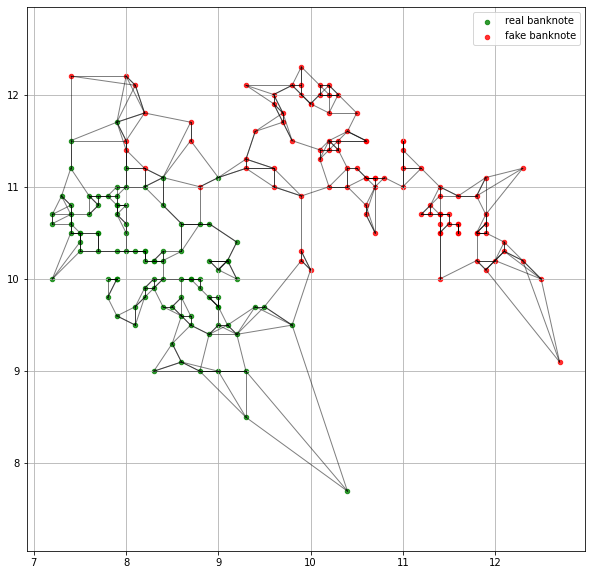

In [8]:
# Use [Numpy function] to find where label = 0 / label = 1
# Put your code here

index_0 = np.where(con==0)
index_1 = np.where(con==1)


# Use data_xy to plot the scatter plot 
# Label = 0 → color = green | Label = 1 → color = red
# Fill X and Y in the plt.scatter
# Remember to put on grid and legend and equal axis
# Put your code here

plt.figure(figsize = (10, 10))
plt.scatter(X0,Y0,s=20, alpha=0.8,c="green")
plt.scatter(X1,Y1,s=20, alpha=0.8,c="red")
plt.axis('equal')
plt.grid()
plt.legend(labels=["real banknote","fake banknote"])
        
# Draw lines from each point to its three nearest neighbors (set K=3)
# Use some zip magic to make it happen (Hint is at below cell)
# You might need loops to generate the plot below
# set parameter [color='black', linewidth=1, alpha=0.5] when you draw lines 
# Put your code here

K = 3
k_small=nearest_partition(dist_sq, K)
for i in range(len(data_xy)):
    for j in range(K):
        plt.plot([data_xy[i,0],data_xy[k_small[i][j],0]],[data_xy[i,1],data_xy[k_small[i][j],1]],color='black', linewidth=1, alpha=0.5)

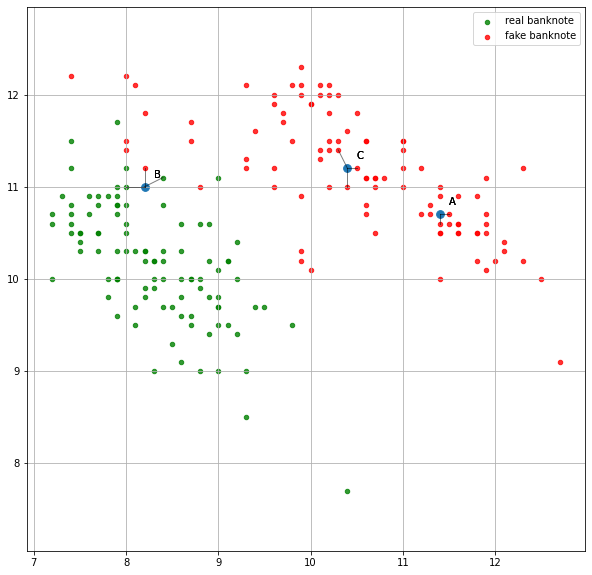

In [9]:
# Set seed = 10 | Random select three dots from data_xy
# Save dots index in varible "target" 
# Don't need to change below three lines

random.seed(10)
target = np.array([random.randint(0, len(data_xy)) for i in range(3)])
text = ['A', 'B', 'C']
X2=[]
Y2=[]
for i in target:
    X2.append(data_xy[i,0])
    Y2.append(data_xy[i,1])

# Use [Numpy function] to find where label = 0 / label = 1
# Put your code here

index_0 = np.where(con==0)
index_1 = np.where(con==1)


# Use data_xy to plot the scatter plot 
# Label = 0 → color = green | Label = 1 → color = red | Target → color = blue
# Fill X and Y in the plt.scatter
# Remember to put on grid and legend and equal axis
# Put your code here

plt.figure(figsize = (10, 10))
plt.scatter(X0,Y0,s=20, alpha=0.8,c="green")
plt.scatter(X1,Y1,s=20, alpha=0.8,c="red")
plt.scatter(X2,Y2,s=60) # Target dots
plt.axis('equal')
plt.grid()
plt.legend(labels=["real banknote","fake banknote"])
        



# Draw lines from the selected three point to its three nearest neighbors (set K=3)
# Use some zip magic to make it happen (Hint is at below cell)
# You might need loops to generate the plot below
# set parameter [color='black', linewidth=1, alpha=0.5] when you draw lines 
# Put text A, B, C on each dots (location: Right + 0.1、 Up + 0.1)
# Put your code here


K = 3
k_small=nearest_partition(dist_sq, K)
for i in range(len(target)):
    for j in range(K):
        plt.plot([data_xy[target[i],0],data_xy[k_small[target[i]][j],0]],[data_xy[target[i],1],data_xy[k_small[target[i]][j],1]],color='black', linewidth=1, alpha=0.5)
        plt.text(data_xy[target[i],0]+0.1,data_xy[target[i],1]+0.1,text[i])


### Question：由上圖進行判斷，回答 ABC 三點各自被 KNN 分為哪一群，並說明原因。

### Your Answer：
###                          A點應被分在red的群,因為離A點最近的三個點中數量最多的是red的群的點
###                          B點應被分在green的群,因為離B點最近的三個點中數量最多的是green的群的點
###                          C點應被分在red的群,因為離C點最近的三個點中數量最多的是red的群的點

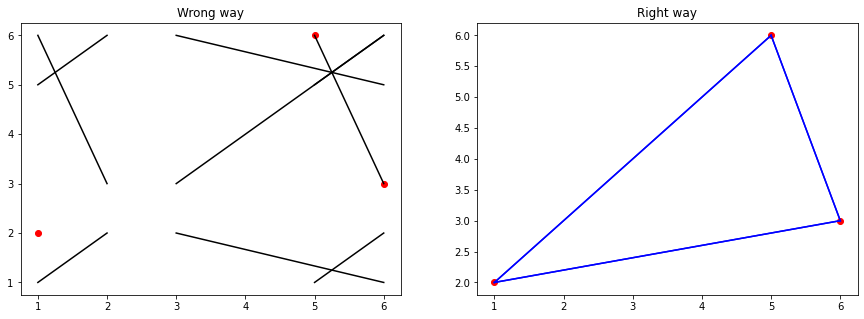

In [10]:
# Hint: How to drow a line between two dots

dots = np.array([[1, 2], [6, 3], [5, 6]])

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.title('Wrong way')        
for i in range(len(dots)):
    plt.scatter(dots[i][0], dots[i][1], color='red')

for i in range(len(dots)):
    for j in range(len(dots)):
        plt.plot(dots[i], dots[j], color = 'black')

plt.subplot(122)
plt.title('Right way')

for i in range(len(dots)):
    plt.scatter(dots[i][0], dots[i][1], color='red')

for i in range(len(dots)):
    for j in range(len(dots)):
        plt.plot(*zip(dots[i], dots[j]), color = 'blue')